In [37]:
import os

In [38]:
os.chdir('D:\\VCRT-v1\\New Images (Cond 4 Only)\\')

# ERP example

In [39]:
import avr_reader

The avr reader function takes a string of the file name and returns the data and other attributions (i.e. channel names, times).

In [40]:
filename = 'Ex10_Suj1_Run4_av-export4_cc-export.avr'
result = avr_reader.avr(filename)

In [41]:
print(result)

{'TSB': 0.0, 'data': array([[  0.00000000e+00,   0.00000000e+00,  -2.30000000e-03, ...,
         -1.43300000e-01,  -1.38000000e-01,  -1.37500000e-01],
       [  0.00000000e+00,   0.00000000e+00,   2.10000000e-04, ...,
         -1.20200000e-01,  -1.18500000e-01,  -1.18100000e-01],
       [  0.00000000e+00,   0.00000000e+00,  -1.40000000e-03, ...,
         -1.66000000e-01,  -1.64800000e-01,  -1.64300000e-01],
       ..., 
       [ -2.53000000e-02,  -2.53000000e-02,  -2.62000000e-02, ...,
          9.42700000e-02,   9.24300000e-02,   9.24300000e-02],
       [ -8.22000000e-02,  -8.22000000e-02,  -8.33000000e-02, ...,
          3.69130000e-01,   3.59330000e-01,   3.59330000e-01],
       [ -1.66020000e+02,  -1.66020000e+02,  -1.92290000e+02, ...,
          2.64128000e+04,   2.59291000e+04,   2.59291000e+04]]), 'DI': 1.0, 'SB': 1.0, 'channelNames': ['FP1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

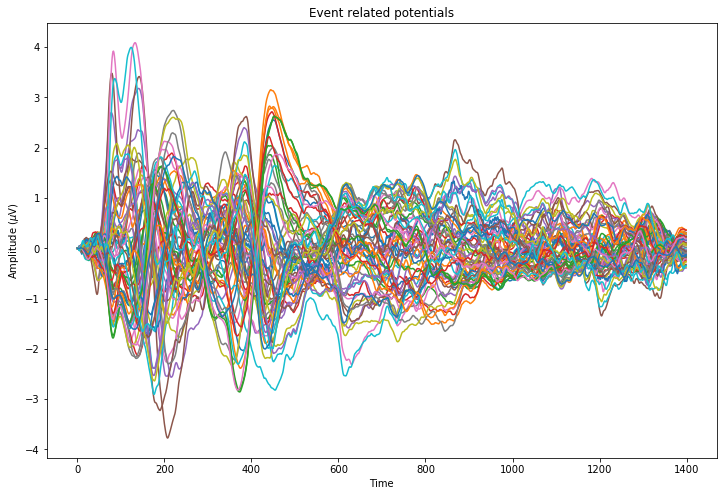

In [43]:
data=result['data']
fig, ax = plt.subplots(figsize=(12,8))
_=ax.plot(data[:-3].T) # take out the last 3 channels: LOC, ROC, and AUX
_=ax.set(xlabel='Time',ylabel='Amplitude ($\mu$V)',title='Event related potentials')

# Time Frequency plot example

In [44]:
os.chdir('D:\\ECoG\\TA328\\')

In [45]:
import tfc_reader

The tfc reader takes a string of the file name and returns the data and other attributions (i.e. time, frequency). 

In [46]:
filename='ta328_verbal_wm_ERA.tfc'
results = tfc_reader.tfc(filename)

In [47]:
print(results)

{'Frequency': array([   4.,    6.,    8.,   10.,   12.,   14.,   16.,   18.,   20.,
         22.,   24.,   26.,   28.,   30.,   32.,   34.,   36.,   38.,
         40.,   42.,   44.,   46.,   48.,   50.,   52.,   54.,   56.,
         58.,   60.,   62.,   64.,   66.,   68.,   70.,   72.,   74.,
         76.,   78.,   80.,   82.,   84.,   86.,   88.,   90.,   92.,
         94.,   96.,   98.,  100.,  102.,  104.,  106.,  108.,  110.,
        112.,  114.,  116.,  118.,  120.,  122.,  124.,  126.,  128.,
        130.,  132.,  134.,  136.,  138.,  140.,  142.,  144.,  146.,
        148.,  150.,  152.,  154.,  156.,  158.,  160.,  162.,  164.,
        166.,  168.,  170.,  172.,  174.,  176.,  178.,  180.,  182.,
        184.,  186.,  188.,  190.,  192.,  194.,  196.,  198.,  200.]), 'data': array([[[  2.66000000e-01,   1.08200000e-01,   4.11000000e-02, ...,
          -1.00000000e-01,  -6.66000000e-02,  -1.34000000e-02],
        [  2.40200000e-01,   1.42000000e-01,   5.31000000e-02, ...,
      

In [48]:
data = results['data']
time = results['time']
freq = results['Frequency']
data.shape # 91 channels, 161 time points, and 99 frequencies

(91, 161, 99)

# Pick one channel

In [49]:
data = data[0,:,:]
data.shape

(161, 99)

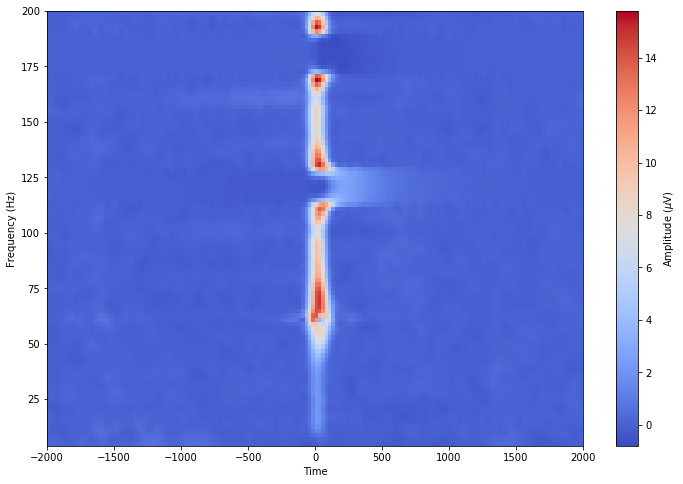

In [50]:
import numpy as np
xx,yy = np.meshgrid(time,freq)
xx.shape,yy.shape
fig,ax = plt.subplots(figsize=(12,8))
k=ax.pcolormesh(xx,yy,data.T,cmap=plt.cm.coolwarm)
ax.set(xlabel='Time',ylabel='Frequency (Hz)')
cbar = plt.colorbar(k)
cbar.set_label('Amplitude ($\mu$V)')